In [1]:
import matplotlib as mpl
mpl.use("pgf")
pgf_with_pdflatex = {
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
}
mpl.rcParams.update(pgf_with_pdflatex)
import matplotlib.pyplot as plt

%pylab inline
import numpy as np
import pylab as pb
import scipy.stats as stats
import seaborn as sns
import pandas as pd
pb.ion()

sns.set_context("paper")


/Users/ggutierrez/anaconda/lib/python3.5/site-packages/matplotlib/backends/backend_pgf.py:54: UserWarning: error getting fonts from fc-list
  warnings.warn('error getting fonts from fc-list', UserWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
#########################
## Question 1
# first 4 columns are input: Wing-length, Wing-width, Tail-length, Arm-length
# last 2 columns are outputs in seconds (flight time for two trials)
data = np.genfromtxt('lab1_data.csv',delimiter=',')

data2 = pd.read_csv('lab1_data.csv', names=["Wing-length", "Wing-width", "Tail-length", "Arm-length", "t1", "t2"])
X = data[:,0:4]
names = ["Wing-length", "Wing-width", "Tail-length", "Arm-length"]

F = np.mean(data[:,4:6],axis=1)[:,None]

# Linear regression

## Q1 Plotting the data

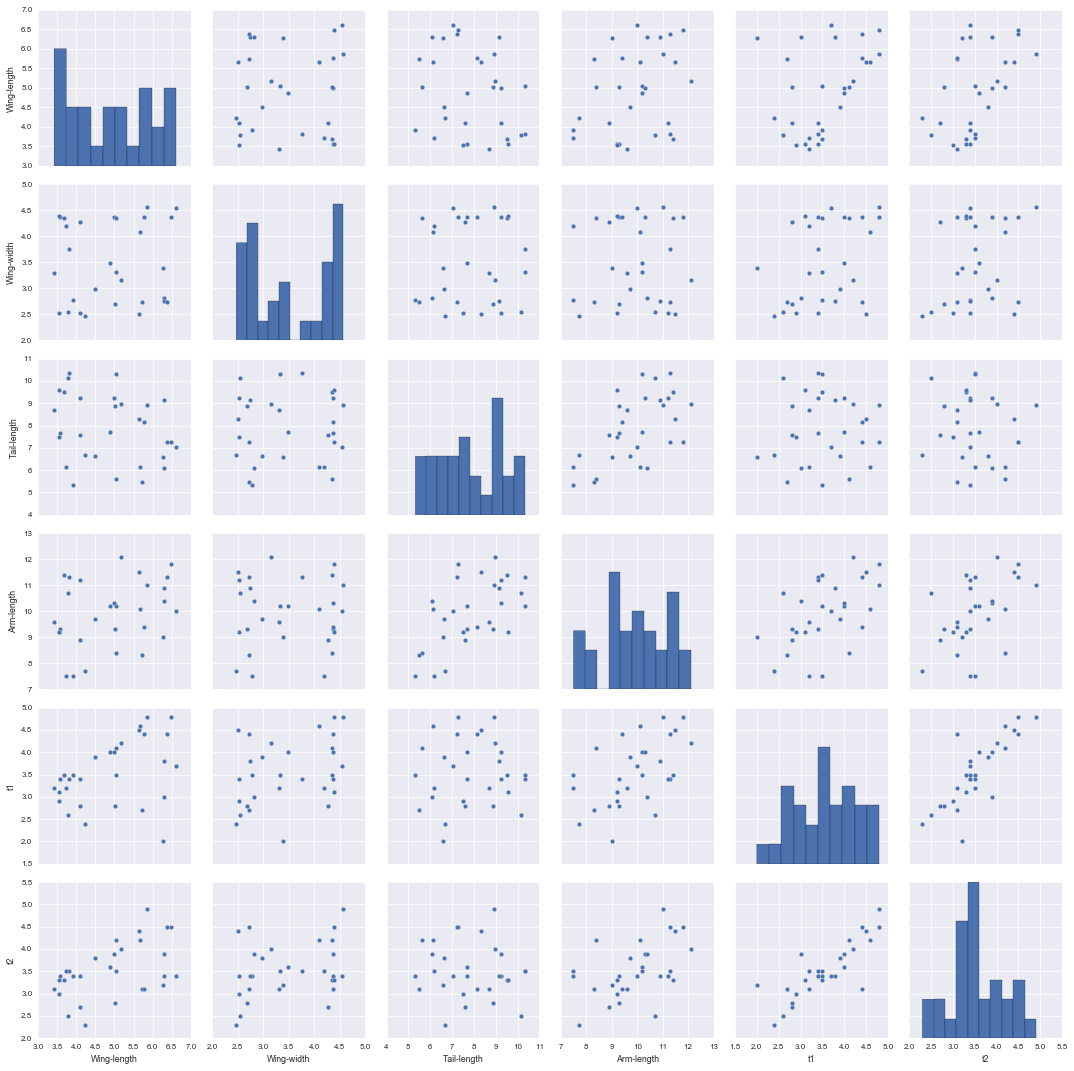

In [16]:
sns.pairplot(data2)

After looking at data we can conclude:
- There is not much noise between the realizations of every experiment.

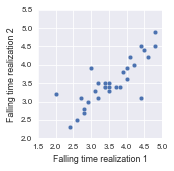

In [43]:
sns.pairplot(data2, x_vars=['t1'], y_vars=['t2'])
plt.xlabel('Falling time realization 1')
plt.ylabel('Falling time realization 2')
plt.savefig('t1_vs_t2.pgf')

In [65]:
np.mean(np.var(data[:,4:6],axis=1))

0.04250000000000001

- There is a linear correlation between the wing length and the falling time.

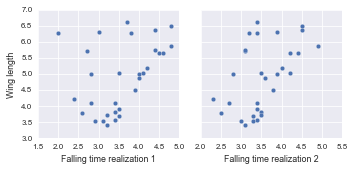

In [60]:
pg = sns.pairplot(data2, x_vars=['t1', 't2'], y_vars=['Wing-length'])
pg.axes[0,0].set_xlabel('Falling time realization 1')
pg.axes[0,1].set_xlabel('Falling time realization 2')
pg.axes[0,0].set_ylabel('Wing length')
plt.savefig('wing_length_vs_times.pgf')

- There is a linear correlation between the arm length and the falling time.

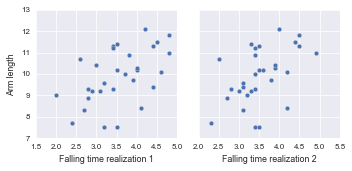

In [58]:
pg = sns.pairplot(data2, x_vars=['t1', 't2'], y_vars=['Arm-length'])
pg.axes[0,0].set_xlabel('Falling time realization 1')
pg.axes[0,1].set_xlabel('Falling time realization 2')
pg.axes[0,0].set_ylabel('Arm length')
plt.savefig('arm_length_vs_times.pgf')

- It seems to be a small linear correlation between the arm length and the tail length.

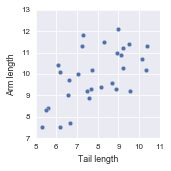

In [59]:
pg = sns.pairplot(data2, x_vars=['Tail-length'], y_vars=['Arm-length'])
pg.axes[0,0].set_xlabel('Tail length')
pg.axes[0,0].set_ylabel('Arm length')
plt.savefig('tail_length_vs_arm_length.pgf')

## Q2 Completing linear regression

In [ ]:
#########################
## Question 2
def B(x):
    # function returning the matrix of basis functions evaluated at x
    #input:	  x, np.array with d columns
    #output:  a matrix of geberal term B_{i,j} = b_j(x_i)
    b0 = np.ones((x.shape[0],1))
    b1 = (x[:,0])[:,None]
    b2 = np.power(b1, 2)
    #b2 = np.sin(b1)
    B = np.hstack((b0,b1,b2))
    return B

def LR(X,F,B,tau2):
    #input:	  X, np.array with d columns representing the DoE
    #		  F, np.array with 1 column representing the observations
    #		  B, a function returning the (p) basis functions evaluated at x
    # 		  tau2, noise variance
    #output:  beta, estimate of coefficients np.array of shape (p,1)
    #		  covBeta, cov matrix of beta, np.array of shape (p,p)

    # ... to be completed ...
    '''BB = np.matrix(B(X))
    A = np.linalg.inv(BB.T*BB)
    D = A*(BB.T)
    C = BB*A
    beta = A*D*F
    covBeta = D*tau2*C'''
    BB = B(X)
    A = np.linalg.inv(np.dot(BB.T, BB))
    C = np.dot(A, BB.T)
    D = np.dot(BB, A)
    beta = np.dot(C, F)
    covBeta = np.dot(C,D)*tau2
    return(beta,covBeta)

t1 = data[:,4]
t2 = data[:,5]
tau2 = np.var(t1 - t2)/2.0
beta, covBeta = LR(X, F, B, tau2)
print beta, covBeta

In [ ]:
#########################
## Question 3

def predLR(x,B,beta,covBeta):
    #function returning predicted mean and variance
    #input:	  x, np.array with d columns representing m prediction points
    #		  B, a function returning the (p) basis functions evaluated at x
    #		  beta, estimate of the regression coefficients
    # 		  covBeta, covariance matrix of beta
    #output:  m, predicted mean at x, np.array of shape (m,1)
    #		  v, predicted variance matrix, np.array of shape (m,m)

    # ... to be completed ...
    BB = B(x)
    m = np.dot(BB, beta)
    v = np.dot(BB,covBeta)
    v = np.dot(v,BB.T)
    return(np.asarray(m),np.asarray(v))

def plotModel(x,m,v):
	#input:	  x, np.array with d columns representing m prediction points
	#		  m, predicted mean at x, np.array of shape (m,1)
	#		  v, predicted variance matrix, np.array of shape (m,m)
    x = x.flatten()
    m = m.flatten()
    v = np.diag(v)
    print x.shape, m.shape
    upper=m+2*np.sqrt(v)
    lower=m-2*np.sqrt(v)
    pb.plot(x,m,color="#204a87",linewidth=2)
    pb.fill(np.hstack((x,x[::-1])),np.hstack((upper,lower[::-1])),color="#729fcf",alpha=0.3)
    pb.plot(x,upper,color="#204a87",linewidth=0.2)
    pb.plot(x,lower,color="#204a87",linewidth=0.2)

def R2(X,F,B,beta):
    return(1-sum((F-np.dot(B(X),beta))**2)/sum((F-np.mean(F))**2))

x = np.random.random_sample((50,X.shape[1]))*10.0
x = np.sort(x, axis=0)
mean_pred, cov_pred = predLR(x, B, beta, covBeta)
plotModel(x[:,0:1], mean_pred, cov_pred)
R2(X,F,B,np.asarray(beta))

In [ ]:
#########################
## Question 4

def pvalue(beta,covBeta,X):
	df = X.shape[0] - len(beta)
	cdf = stats.t.cdf(np.abs(beta)/np.sqrt(np.diag(covBeta)),df)
	return(2*(1 - cdf))

#########################
## Question 5

## coordinate change
def angle(X):
	# X is Wing-length, Wing-width, Tail-length, Arm-length
	# returns the angle (in degrees) between the tail and the wing
    return(np.pi/180*np.arccos(-1.*((X[:,3]-2.5)**2-(X[:,2]-2.5)**2-X[:,0]**2)/(2*(X[:,2]-2.5)*X[:,0])))

def armLength(X):
	# X is Wing-length, Wing-width, Tail-length, angle (in degrees) between the tail and the wing
	# returns the arm length
	return(np.sqrt(X[:,0]**2+(X[:,2]-2.5)**2-2*np.cos(X[:,3]*180/np.pi)*X[:,0]*(X[:,2]-2.5))+2.5)


#########################
## Question 6